Integrantes del Equipo:

1.   Daniela María Hernández Céspedes
2.   Vanesa Alexandra Lopera Mazo
3.   Juan Mauricio Sierra Valencia

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-01-FUNDAMENTOS/master/init.py
import init; init.init(force_download=False);

# Precios de Casas

El objetivo de este taller es realizar un análisis exploratorio de un dataset. El dataset no llega limpio, el proceso de limpieza se encuentra implementado. Después de este proceso de limpieza se debe llevar a cabo el análisis exploratorio.

In [2]:
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
#!pip install matplotlib --upgrade
matplotlib.__version__ #La versión debe ser 3.5.3

'3.5.3'

## Entendiendo y limpiando el dataset

La descripcion de cada variable puede verse ejecutando la siguiente celda

In [ ]:
!cat local/data/houseprices_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Ahora carguemos los datos y hagamos una breve exploración

In [4]:
df = pd.read_csv("local/data/houseprices.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Podemos ver que hay una gran cantidad de valores nulos en algunas de las variables. Alguien, algo despistado, podría sugerir simplemente eliminar esas variables; sin embargo, la descripción de las variables que observamos anteriormente, nos permite entender la razón de ser de estos valores nulos y tratarlos de una manera inteligente. Por ejemplo, consideremos la variable `PoolQC` la cual nos muestra únicamente 7 valores no nulos de los 1460 registros que tenemos en total. Su descripción dice:

```
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

```

Esta variable hace referencia a la calidad de la piscina en la casa y vemos que `NA` significa que no tiene piscina, lo cual posiblemente tiene mucho impacto en el precio de una casa (pregúntese, ¿estaría dispuesto a pagar más por una casa que tenga piscina?). Además, vemos que existe la variable `PoolArea`, la cual almacena el area de la piscina en $ft^2$, la cual no tiene valores nulos. Dado esto, los valores nulos de la variable `PoolQC` deben corresponder a casos en los que la variable `PoolArea` es cero; validemos esto.

In [6]:
num_total_nulls = df["PoolQC"].isna().sum()
num_nulls_when_poolarea_is_zero = df[df["PoolArea"] == 0]["PoolQC"].isna().sum()
assert num_nulls_when_poolarea_is_zero == num_total_nulls

In [7]:
num_nulls_when_poolarea_is_not_zero = df[df["PoolArea"] != 0]["PoolQC"].isna().sum()
assert num_nulls_when_poolarea_is_not_zero == 0

Concluimos que se cumple que todos los valores nulos de la variable `PoolQC` corresponden a casos en los que no hay piscina; por lo tanto, vamos a reemplzar los valores nulos por otro valor que podamos usar en nuestros modelos.

In [8]:
df["PoolQC"] = df["PoolQC"].fillna("NP")

Esta misma lógica debemos usarla a la hora de tratar el resto de las variables con valores nulos de este dataset. Escribiremos algún razonamiento addiconal únicamente cuando haga falta

In [9]:
num_total_nulls = df["MiscFeature"].isna().sum()
num_nulls_when_miscval_is_zero = df[df["MiscVal"] == 0]["MiscFeature"].isna().sum()
num_nulls_when_miscval_is_not_zero = df[df["MiscVal"] != 0]["MiscFeature"].isna().sum()
assert num_nulls_when_miscval_is_zero == num_total_nulls
assert num_nulls_when_miscval_is_not_zero == 0
df["MiscFeature"] = df["MiscFeature"].fillna("No MF")

In [10]:
num_total_nulls = df["FireplaceQu"].isna().sum()
num_nulls_when_fireplaces_is_zero = df[df["Fireplaces"] == 0]["FireplaceQu"].isna().sum()
num_nulls_when_fireplaces_is_not_zero = df[df["Fireplaces"] != 0]["FireplaceQu"].isna().sum()
assert num_nulls_when_fireplaces_is_zero == num_total_nulls
assert num_nulls_when_fireplaces_is_not_zero == 0
df["FireplaceQu"] = df["FireplaceQu"].fillna("No FP")

In [11]:
num_area_zeros = (df["GarageArea"] == 0).sum()
num_cars_zeros = (df["GarageCars"] == 0).sum()
num_both_zeros = ((df["GarageArea"] == 0) & (df["GarageCars"] == 0.0)).sum()
assert num_both_zeros == num_area_zeros == num_cars_zeros
for colname in ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]:
    num_total_nulls = df[colname].isna().sum()
    num_nulls_when_area_and_cars_capacity_is_zero = df[(df["GarageArea"] == 0.0) & (df["GarageCars"] == 0.0)][colname].isna().sum()
    num_nulls_when_area_and_cars_capacity_is_not_zero = df[(df["GarageArea"] != 0.0) & (df["GarageCars"] != 0.0)][colname].isna().sum()
    assert num_total_nulls == num_nulls_when_area_and_cars_capacity_is_zero
    assert num_nulls_when_area_and_cars_capacity_is_not_zero == 0
    df[colname] = df[colname].fillna("No Ga")

Para la variable `GarageYrBlt` debemos ser más cuidadosos, ya que son números y no strings. Esta variable nos dice el año en que fue construido el garaje y, según lo visto con otras variables relacionadas al garage, los valores nulos corresponden a casos en los que no hay garage. En este caso, vamos a imputar esa variable con un año posterior a la fecha de venta. Esta aproximación podría no funcionar muy bien con modelos lineales, o cuando escalamos los datos, pero no se me ocurre otra!

In [12]:
num_total_nulls = df["GarageYrBlt"].isna().sum()
num_nulls_when_area_and_cars_is_zero = df[(df["GarageArea"] == 0.0) & (df["GarageCars"] == 0.0)]["GarageYrBlt"].isna().sum()
num_nulls_when_area_and_cars_is_not_zero = df[(df["GarageArea"] != 0.0) & (df["GarageCars"] != 0.0)]["GarageYrBlt"].isna().sum()
assert num_nulls_when_area_and_cars_is_zero == num_total_nulls
assert num_nulls_when_area_and_cars_is_not_zero == 0
df["GarageYrBlt"].where(~df["GarageYrBlt"].isna(), other=df["YrSold"] + 1, inplace=True)

`LotFrontage: Linear feet of street connected to property)`

Valores nulos en esta variable podrían ser ocasionados porque sencillamente no hay conexión de la calle a la propiedad, es decir, que esa longitud medida por esta variable es igual a 0. Podemos asumir que este es el caso únicamente si no hay otro 0 en los valores que ha tomado esta variable, de otra manera ¿por qué algunos tendrían 0 y otros nulos?

In [13]:
assert (df["LotFrontage"] == 0).sum() == 0
df["LotFrontage"].fillna(0, inplace=True)

In [14]:
df["Alley"].fillna("NA", inplace=True)
df["Fence"].fillna("NF", inplace=True)

```
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet
```

Una posibilidad es que los valores nulos de `MasVnrType` y `MasVnrArea` correspondan a casos en los que no hay "Masonry veneer" (chapa de albañilería). Esto sería en los casos en que la variable `MasVnrArea` sea 0, esto lo validaremos de la misma manera en que validamos con la variable `LotFrontage`.

In [15]:
assert (df["MasVnrArea"] == 0).sum() == df["MasVnrType"].isnull().sum()

AssertionError: ignored

Acá la situación es diferente, el error anterior nos dice que los casos para los cuales no tenemos área son distintos de los que el tipo es nulo, entonces nos toca inspeccionar más en detalle. Sabemos que hay 8 valores nulos en cada una de las dos variables, miremos si corresponden a los mismos registros:

In [16]:
np.logical_and(df["MasVnrType"].isnull().values, df["MasVnrArea"].isnull().values).sum()

8

En efecto, dado que hay 8 registros para los cuales las dos variables tienen valores nulos, podemos decir que son nulos en ambas partes. A falta de información, vamos a decidir eliminar esos registros por completo, no debe ser muy grave, pues apenas son 8 filas en todo el dataset.

In [17]:
df = df.dropna(subset=["MasVnrType", "MasVnrArea"])

Ahora miremos los valores de cada una

In [18]:
df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [19]:
df["MasVnrArea"].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

Acá podemos observar lo siguiente:
- Hay 864 registros con `MasVnrType="None"`
- Hay 861 registros con `MasVnrArea=0`

Eso quiere decir que hay algunos registros que deberían tener un área de 0 y no es así. Vamos a mirar en detalle cuáles son:

In [20]:
df[(df["MasVnrType"] == "None") & (df["MasVnrArea"] != 0.0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,625,60,RL,80.0,10400,Pave,NA,Reg,Lvl,AllPub,...,0,NP,NF,No MF,0,11,2006,WD,Normal,165150
773,774,20,RL,70.0,10150,Pave,NA,Reg,Lvl,AllPub,...,0,NP,NF,No MF,0,7,2007,COD,Normal,114500
1230,1231,90,RL,0.0,18890,Pave,NA,IR1,Lvl,AllPub,...,0,NP,NF,Gar2,8300,8,2007,WD,Normal,190000
1300,1301,60,RL,0.0,10762,Pave,NA,IR1,Lvl,AllPub,...,0,NP,NF,No MF,0,5,2009,WD,Normal,225000
1334,1335,160,RM,24.0,2368,Pave,NA,Reg,Lvl,AllPub,...,0,NP,NF,No MF,0,5,2009,WD,Normal,125000


**Francamente** yo no soy un experto en casas, por lo que no tengo forma de deducir a qué se debe esa incoherencia en los datos. Por lo anterior, simplemente voy a eliminar esas filas, ya que tengo dudas de la veracidad de esos datos.

In [21]:
df = df[~((df["MasVnrType"] == "None") & (df["MasVnrArea"] != 0.0))]

La variable `Electrical` tampoco nos ofrece una forma de recuperar esos valores nulos, por lo que también vamos a eliminar ese registro. Nótese que otra opción podría ser reemplazarlo con el valor más común en la misma variable, dado que esta es categórica. 

In [22]:
df.dropna(subset=["Electrical"], inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1446 non-null   int64  
 1   MSSubClass     1446 non-null   int64  
 2   MSZoning       1446 non-null   object 
 3   LotFrontage    1446 non-null   float64
 4   LotArea        1446 non-null   int64  
 5   Street         1446 non-null   object 
 6   Alley          1446 non-null   object 
 7   LotShape       1446 non-null   object 
 8   LandContour    1446 non-null   object 
 9   Utilities      1446 non-null   object 
 10  LotConfig      1446 non-null   object 
 11  LandSlope      1446 non-null   object 
 12  Neighborhood   1446 non-null   object 
 13  Condition1     1446 non-null   object 
 14  Condition2     1446 non-null   object 
 15  BldgType       1446 non-null   object 
 16  HouseStyle     1446 non-null   object 
 17  OverallQual    1446 non-null   int64  
 18  OverallC

Ahora miremos las variables relacionadas con el basement:

```

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

```

Dado que los valores nulos en varias de estas variables corresponden a `No Basement`, ahora miremos si los registros nulos en algunas corresponden a los registros nulos en todas. Primero, dado que ya hemos eliminado varios registros, vamos a ver cuántos valores nulos hay en esas variables.

In [24]:
colnames = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]
for c in colnames:
    print(f"{c} has {df[c].isnull().sum()} null values")

BsmtQual has 37 null values
BsmtCond has 37 null values
BsmtExposure has 38 null values
BsmtFinType1 has 37 null values
BsmtFinSF1 has 0 null values
BsmtFinType2 has 38 null values
BsmtFinSF2 has 0 null values
BsmtUnfSF has 0 null values
TotalBsmtSF has 0 null values


In [25]:
df["TotalBsmtSF"].value_counts()

0       37
864     35
672     17
912     14
1040    14
        ..
1581     1
707      1
611      1
1452     1
1542     1
Name: TotalBsmtSF, Length: 716, dtype: int64

Acá vemos que algunas tienen más variables nulas que otras, lo cual es confuso porque en cualquier caso los valores nulos deberían significar que no hay basement. En este caso vamos a reemplazar los valores en los que los valores nulos sean en todas las variables no numéricas pero los que sobren los eliminaremos.

In [26]:
colnames = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
cond = ~(df["BsmtQual"].isna() & df["BsmtCond"].isna() & df["BsmtExposure"].isna() & df["BsmtFinType1"].isna() & df["BsmtFinType2"].isna())
for c in colnames:
    df[c].where(cond, other="NB", inplace=True)

In [27]:
df.dropna(inplace=True)
print(f"Number of null values {df.isna().sum().sum()} in a dataframe of shape {df.shape}")

Number of null values 0 in a dataframe of shape (1444, 81)


## Análisis exploratorio de datos

En esta sección se dejarán preguntas que deben ser respondidas utilizando los datos.

**¿Qué tan viejas son las casas?**

<AxesSubplot:>

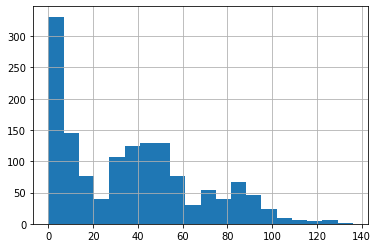

In [28]:
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
df["HouseAge"].hist(bins=20)

In [29]:
df[["HouseAge","YrSold","YearBuilt"]].sort_values("HouseAge",ascending=False)
#df = df[~((df["MasVnrType"] == "None") & (df["MasVnrArea"] != 0.0))]

,HouseAge,YrSold,YearBuilt
1349,136,2008,1872
1137,135,2010,1875
747,129,2009,1880
304,128,2008,1880
1132,127,2007,1880
...,...,...,...
688,0,2007,2007
1228,0,2008,2008
875,0,2007,2007
350,0,2007,2007


**¿Cómo se relaciona el precio con la edad de la casa?**

En la siguiente gráfica de dispersión, se observa la correlación entre la antigüedad de la casa y el precio de venta. En este caso la correlación es negativa (-52.3%), esto quiere decir que entre más antigua sea la casa, más devaluada está.

Text(0.5, 0, 'antiguedad')

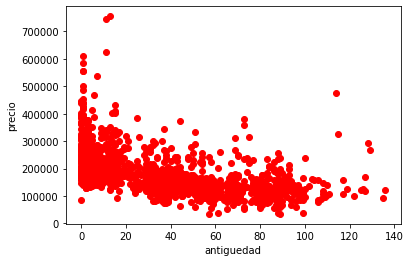

In [30]:
plt.plot(df['HouseAge'],df['SalePrice'],'ro')
plt.ylabel('precio')
plt.xlabel('antiguedad')

<AxesSubplot:>

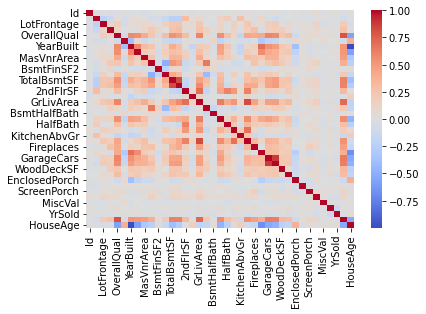

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
#plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'coolwarm')
#df.corr() #Tabla de correlación de todas las variables

**¿Cuál es el barrio más pobre?**

Para la determinación del barrio más pobre se decidió estimar un índice de pobreza a nivel de vivienda. En el cálculo de dicho índice se tuvo en cuenta un subconjunto de variables que podían reflejar el nivel de pobreza y posteriormente, a las categorías de cada una de las variables se le asignó un valor numérico que puede variar entre 1 y 4, donde:
1.   indicador de pobreza leve
2.   indicador de pobreza medio
3.   indicador de pobreza alto
4.   indicador de pobreza muy alto

Dichos índices fueron asigandos de manera cualitativa.

Los atributos que fueron incluidos para la estimación del indice se encuentran en la variable poverty_related_variable.
Los valores asignados a cada categoría se muestran a contunación. Cualquier categoría que no se encuentre en el diccionario poverty_levels se entiende que no refleja un nivel de pobreza por lo tanto su valor será cero.

In [32]:
poverty_related_variables = ['Street','Alley','Utilities','OverallQual','OverallCond',
                             'ExterQual','ExterCond','BsmtQual','BsmtCond',
                             'HeatingQC','CentralAir','KitchenQual','PoolQC']

poverty_levels = {'Street':{'Grvl':1},
                 'Alley':{'Grvl':1,'NA':4},
                 'Utilities':{'NoSeWa':3,'ELO':4},
                 'OverallQual':{5:1,4:2,3:3,2:4,1:4},
                 'OverallCond':{5:1,4:2,3:3,2:4,1:4},
                 'ExterQual':{'TA':2,'Fa':3,'Po':4},
                 'ExterCond':{'TA':2,'Fa':3,'Po':4},
                 'BsmtQual':{'Fa':1,'Po':2,'NA':3},
                 'BsmtCond':{'Fa':1,'Po':2,'NA':3},
                 'HeatingQC':{'TA':1,'Fa':3,'Po':4},
                 'CentralAir':{'N':2},
                 'KitchenQual':{'TA':1,'Fa':3,'Po':4},
                 'PoolQC':{'NA':1}}

In [33]:
df_poverty_indicators = df[poverty_related_variables]
df_poverty_values = pd.DataFrame()

for column in poverty_related_variables:
    df_poverty_values[f'{column}_Pov_Index'] = df_poverty_indicators[column].map(poverty_levels[column])
df_poverty_values['TotaPovIndex']=df_poverty_values.sum(axis=1)
df_poverty_values['Neighborhood'] = df['Neighborhood']
df_poverty_values = df_poverty_values.fillna(0)

df_poverty_by_neighbour = df_poverty_values[['TotaPovIndex','Neighborhood']].groupby('Neighborhood').mean()
df_poverty_by_neighbour.sort_values('TotaPovIndex',ascending=False)

,TotaPovIndex
Neighborhood,
IDOTRR,12.675676
MeadowV,11.705882
Edwards,11.410000
BrkSide,11.155172
SWISU,10.960000
BrDale,10.933333
Sawyer,10.726027
NPkVill,10.555556
NAmes,10.437500


Con base en el dataframe anterior, el barrio más pobre es IDOTRR (Iowa DOT and Rail Road)

**¿Cuál es el barrio más cercano a vías férreas?**

In [34]:
df['Condition1'].value_counts()

Norm      1246
Feedr       79
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Nos interesa filtrar por RRAn y RRAe, ya que son los barrios adyacentes al ferrocarril, luego hacemos este mismo filtro para la condicion 2, teniendo en cuenta que esta solo tiene RRAn

In [35]:
df_ferrocarril = df[(df['Condition1']=='RRAn') | (df['Condition1']=='RRAe') | (df['Condition2']=='RRAn') | (df['Condition2']=='RRAe')]
df_ferrocarril= df_ferrocarril.groupby(['Neighborhood']).size().reset_index(name='numero_casas_ady')
df_ferrocarril1= df.groupby(['Neighborhood']).size().reset_index(name='numero_casas')
prom_barrio = pd.merge(df_ferrocarril,df_ferrocarril1,how='inner',on='Neighborhood')
prom_barrio = prom_barrio[['Neighborhood','numero_casas_ady','numero_casas']]
prom_barrio['promedio %'] = round((prom_barrio['numero_casas_ady']/prom_barrio['numero_casas'])*100,2)
prom_barrio

,Neighborhood,numero_casas_ady,numero_casas,promedio %
0,BrkSide,7,58,12.07
1,Gilbert,8,77,10.39
2,IDOTRR,1,37,2.70
3,NWAmes,7,72,9.72
4,OldTown,1,113,0.88
5,Sawyer,6,73,8.22
6,SawyerW,4,58,6.90
7,Somerst,4,83,4.82


Entonces, el barrio más cercano a vías ferreas es **BrkSide** ya que es el barrio con mayor numero de casas adyacentes a una via ferrea en relación al total de casas 


**¿Cuál es la cobertura más común en las casas que se encuentran el el top 10% en precio?**

Calculamos el percentil 90, luego filtramos aquellas casas que están por encima del percentil 90 en "SalePrice", de esta manera hallamos las casas que se encuentran en el top 10% en precio.

Remplazamos: [CmentBd por CemntBd, Wd Shng por WdShing] en el campo Exterior2nd, ya que es un error de redacción

Y por último, creamos un campo único entre Exterior1st y Exterior2nd, concatenado ambos campos cuando sean diferentes

In [37]:
p = np.percentile(df['SalePrice'], 90)
top10 = df[(df['SalePrice'] > p)]
top10['Exterior2nd'].replace(to_replace=['CmentBd', 'Wd Shng'], value=['CemntBd', 'WdShing'], inplace=True)
def func(x):
     return x['Exterior1st'] + " | " + x['Exterior2nd'] if x['Exterior1st'] != x['Exterior2nd'] else x['Exterior1st']
top10['Exterior_covering']= top10.apply(func, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creando un gráfico de barras es fácil concluir que la cobertura más común para las casas que se encuentran en el top10% en precio es **Vinyl Siding** con 83 casas.

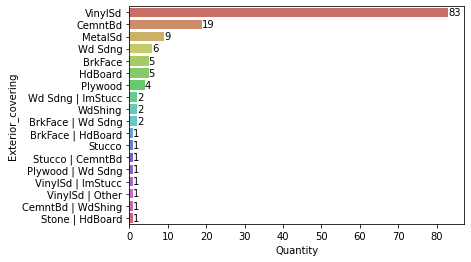

In [38]:
import seaborn as sns
top10_plot = top10.groupby("Exterior_covering")[["Id"]].count().reset_index().sort_values(by = 'Id', ascending = False)
ax = sns.barplot(y = 'Exterior_covering', x = 'Id' , data = top10_plot, palette = 'hls', )
ax.set_xlabel('Quantity')
ax.bar_label(ax.containers[0]);

**¿En qué barrio hay mayor desigualdad?**

Teniendo en cuenta el índice de pobreza calculado anteriormente, la desigualdad se estimó como la desviación estándar de dicho índice en cada barrio

In [39]:
df_inequality = df_poverty_values.groupby('Neighborhood').std()['TotaPovIndex'].sort_values(ascending=False)
df_inequality[:14]

Neighborhood
IDOTRR     4.678877
BrkSide    4.158280
Edwards    3.547926
SWISU      3.409301
OldTown    3.335606
Crawfor    2.837432
SawyerW    2.543571
NAmes      2.326611
NWAmes     1.985422
Timber     1.917205
Sawyer     1.916741
Mitchel    1.907736
MeadowV    1.896204
Somerst    1.768318
Name: TotaPovIndex, dtype: float64

Dado lo anterior, el barrio con mayor desigualdad es al tiempo el barrio con mayor pobreza, es decir IDOTRR (Iowa DOT and Rail Road) :

**¿En qué año hubo más movimiento del mercado inmobiliario?**

En el año 2009 fue donde hubo más movimiento del mercado inmoviliario en términos de cantidad, con 334 casas vendidas
Sin embargo, el año 2007 fue donde hubo más movimiento del mercado inmoviliario en términos de dinero, con +60 millones de dolares en ventas

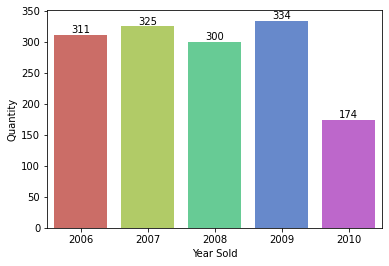

In [40]:
years = df.groupby("YrSold")[["Id"]].count().reset_index()
ax = sns.barplot(x = 'YrSold', y = 'Id' , data = years, palette = 'hls', )
ax.set_xlabel('Year Sold')
ax.set_ylabel('Quantity')
ax.bar_label(ax.containers[0]);

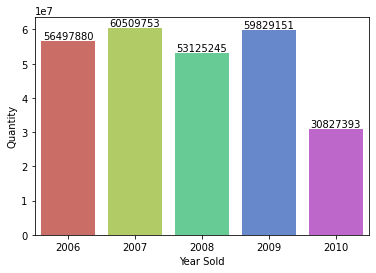

In [41]:
years2 = df.groupby("YrSold")[["SalePrice"]].sum().reset_index()
ax = sns.barplot(x = 'YrSold', y = 'SalePrice' , data = years2, palette = 'hls', )
ax.set_xlabel('Year Sold')
ax.set_ylabel('Quantity')
ax.bar_label(ax.containers[0], fmt = '%d');

**¿Cuáles son los 2 barrios con mayor industria cerca?**

No hay ningún barrio con industria cerca (tomando como referencia la clasificación de la zona)

In [42]:
industry = df.groupby(['MSZoning', 'Neighborhood']).agg({'Id': 'count'}).reset_index().rename(columns={'Id':'Quantity'})
industry[['Neighborhood', 'Quantity']].loc[(industry['MSZoning'].str.contains('I'))].sort_values(by = 'Quantity', ascending = False).head(2)

,Neighborhood,Quantity


**¿Cuáles son los 2 barrios con mayor comercio cerca?**

Los únicos dos barrios que tienen comercio cerca (tomando como referencia la clasificación de la zona) son Iowa DOT and Rail Road y Old Town

In [43]:
commercial = df.groupby(['MSZoning', 'Neighborhood']).agg({'Id': 'count'}).reset_index().rename(columns={'Id':'Quantity'})
commercial[['Neighborhood', 'Quantity']].loc[(commercial['MSZoning'].str.contains('C'))].sort_values(by = 'Quantity', ascending = False).head(2)

,Neighborhood,Quantity
0,IDOTRR,9
1,OldTown,1
